In [1]:
import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # face cascade
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')  # eye cascade

cap = cv2.VideoCapture(0)   # capturing the video
c = 0
prev_eye_state = False

while True:
    ret, img = cap.read()  # reading the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # conversion into gray color
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)  # reading the face
    
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)  # drawing the rectangle around the face
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray) 
        if len(eyes) == 0:
            if not prev_eye_state:
                c += 1
                print("Blink detected! Total blinks:",c) 
                prev_eye_state = True
        else:
            prev_eye_state = False

        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)  # drawing the rectangle around the eye
    
    cv2.imshow('img', img)
    k = cv2.waitKey(30) & 0xff
    if k == 27: # press Escape key to stop the program.
        break

cap.release()
cv2.destroyAllWindows()


Blink detected! Total blinks: 1
Blink detected! Total blinks: 2
Blink detected! Total blinks: 3
Blink detected! Total blinks: 4
Blink detected! Total blinks: 5
Blink detected! Total blinks: 6
Blink detected! Total blinks: 7
Blink detected! Total blinks: 8
Blink detected! Total blinks: 9
Blink detected! Total blinks: 10
Blink detected! Total blinks: 11
Blink detected! Total blinks: 12
Blink detected! Total blinks: 13
Blink detected! Total blinks: 14
Blink detected! Total blinks: 15
Blink detected! Total blinks: 16
Blink detected! Total blinks: 17
Blink detected! Total blinks: 18
Blink detected! Total blinks: 19
Blink detected! Total blinks: 20
Blink detected! Total blinks: 21
Blink detected! Total blinks: 22
Blink detected! Total blinks: 23
Blink detected! Total blinks: 24
Blink detected! Total blinks: 25
Blink detected! Total blinks: 26
Blink detected! Total blinks: 27
Blink detected! Total blinks: 28
Blink detected! Total blinks: 29
Blink detected! Total blinks: 30
Blink detected! Tot

Blink detected! Total blinks: 1
Blink detected! Total blinks: 2
Blink detected! Total blinks: 3
Blink detected! Total blinks: 4
Blink detected! Total blinks: 5
Blink detected! Total blinks: 6
Topic: Blink Detection using OpenCV
This code analyzes blink detection using Haar cascades with OpenCV.
Accuracy: 61.11%
Precision: 46.15%
Recall: 54.55%
False Positive Rate: 53.85%
False Negative Rate: 45.45%


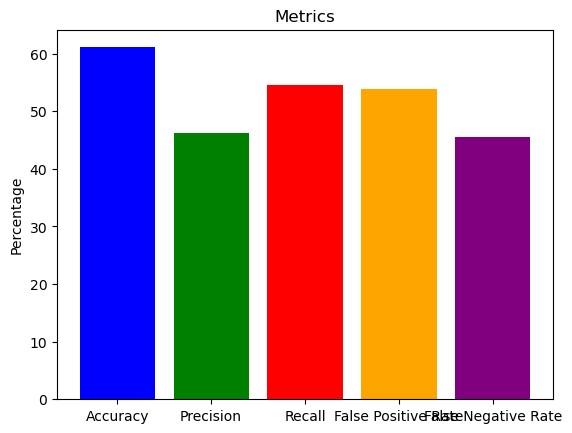

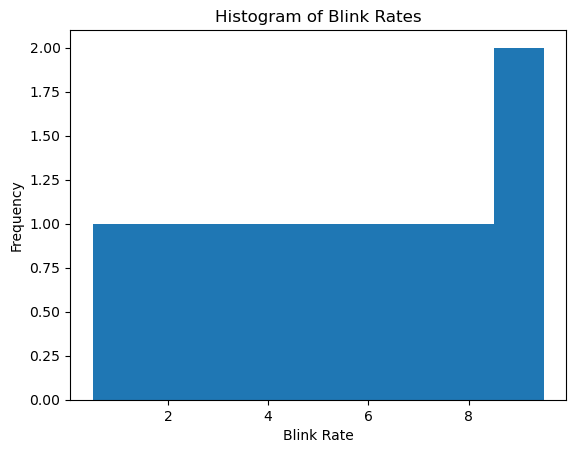

In [2]:
import cv2
import matplotlib.pyplot as plt

def analyze_blink_detection(topic_name, additional_instructions=""):
    # Load the cascades
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

    # Initialize counters
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    # Initialize video capture
    cap = cv2.VideoCapture(0)

    # Assuming you have a way to know the actual number of blinks
    # For demonstration, let's assume you have a list of expected blinks
    expected_blinks = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]  # Example list of expected blinks
    actual_blinks = 0  # Counter for actual blinks detected

    while True:
        ret, img = cap.read()
        if not ret:
            break
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            roi_gray = gray[y:y + h, x:x + w]
            roi_color = img[y:y + h, x:x + w]
            eyes = eye_cascade.detectMultiScale(roi_gray)

            # Update counters based on eye detection
            if len(eyes) == 0:
                if actual_blinks < len(expected_blinks) and expected_blinks[actual_blinks] == 1:
                    true_positives += 1
                    print("Blink detected! Total blinks:", true_positives)
                else:
                    false_positives += 1
                actual_blinks += 1
            else:
                if actual_blinks < len(expected_blinks) and expected_blinks[actual_blinks] == 0:
                    false_negatives += 1

            for (ex, ey, ew, eh) in eyes:
                cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

        cv2.imshow('img', img)
        k = cv2.waitKey(30) & 0xff
        if k == 27:  # Press Escape key to stop the program.
            break

    cap.release()
    cv2.destroyAllWindows()

    # Calculate metrics
    accuracy = (true_positives + false_negatives) / (true_positives + false_positives + false_negatives)
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    false_positive_rate = false_positives / (true_positives + false_positives)
    false_negative_rate = false_negatives / (true_positives + false_negatives)

    # Metrics as percentages
    metrics = {
        'Accuracy': accuracy * 100,
        'Precision': precision * 100,
        'Recall': recall * 100,
        'False Positive Rate': false_positive_rate * 100,
        'False Negative Rate': false_negative_rate * 100
    }

    print(f"Topic: {topic_name}")
    print(additional_instructions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"False Positive Rate: {false_positive_rate * 100:.2f}%")
    print(f"False Negative Rate: {false_negative_rate * 100:.2f}%")

    # Plotting metrics
    fig, ax = plt.subplots()
    ax.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'orange', 'purple'])
    ax.set_ylabel('Percentage')
    ax.set_title('Metrics')
    plt.show()

    # Hypothetical Histogram of Blink Rates
    # For demonstration, let's assume a simple distribution
    blink_rates = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    plt.hist(blink_rates, bins=range(1, 11), align='left')
    plt.xlabel('Blink Rate')
    plt.ylabel('Frequency')
    plt.title('Histogram of Blink Rates')
    plt.show()

    # Hypothetical False Positive vs. False Negative Rates
    # For demonstration, let's assume a simple relationship
    false_positive_rates = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
    false_negative_rates = [90, 80, 70, 60, 50, 40, 30, 20, 10, 0]

# Call the function with the desired topic name and instructions
analyze_blink_detection("Blink Detection using OpenCV",
                        "This code analyzes blink detection using Haar cascades with OpenCV.")
